Run using ``ipython3 nbconvert --to slides --post serve basic-numpy.ipynb`` (Now using livereveal)

In [1]:
%matplotlib nbagg

# For easier python 2 compatibility:
from __future__ import division, print_function, absolute_import

# Normal imports:
import numpy as np

In [2]:
import numpy as np

# Keep the random numbers identical over runs
np.random.seed(12345)

# Introduction to the scientific python stack

Basic module NumPy
==================
  * Basis for scientific computing with Python
  * A powerfull N-dimension array object
  * Basic and not so basic math operations
  * Linear algebra operations
  * _Normally_ homogenous data (i.e. numbers)
  * random numbers, FFT, sorting, …

Convention
----------

In [3]:
import numpy as np

# Numpy is useful

* Homogenous data:
  - Experimental data sets
  - Simulations
  - …

   **For example**:

In [4]:
x = np.linspace(0, 9, 1001)
print(x[::200])

[ 0.   1.8  3.6  5.4  7.2  9. ]


In [5]:
print(np.sqrt(x)[::200])

[ 0.          1.34164079  1.8973666   2.32379001  2.68328157  3.        ]


NumPy can be much faster (typically $\approx 50\times$):

In [6]:
%%timeit
numpy_result = np.sqrt(x)

100000 loops, best of 3: 3.93 µs per loop


In [7]:
from math import sqrt
x = list(x)

In [8]:
%%timeit
python_result = [sqrt(value) for value in x]

10000 loops, best of 3: 86.4 µs per loop


(The actual speedup depends, but it can be much more for simple operations like $\times, +$)

# Arrays are N-Dimensional (``ndarray``)

A bit like nested lists:

## 0 Dimensional

In [9]:
arr = np.array(5)
# although 0-d arrays are sometimes a bit special :(
print(arr)
print('The rank is:', arr.ndim)
print('The shape is:', arr.shape)

5
The dimension is: 0
The shape is: ()


## 1 Dimensional

In [10]:
arr = np.array([4, 5, 6])
print(arr)
print('The dimension is:', arr.ndim)
print('The shape is:', arr.shape)

[4 5 6]
The dimension is: 1
The shape is: (3,)


## 2 Dimensional

In [11]:
arr = np.array([[1, 2],
                [3, 4],
                [5, 6]])
print(arr)
print('The dimension is:', arr.ndim)
print('The shape is:', arr.shape)

[[1 2]
 [3 4]
 [5 6]]
The dimension is: 2
The shape is: (3, 2)


## 3 Dimensional

In [12]:
arr = np.array([[[1, 2],
                 [2, 3]],
                [[4, 5],
                 [8, 9]]])
print('The dimension is:', arr.ndim)
print('The shape is:', arr.shape)

The dimension is: 3
The shape is: (2, 2, 2)


# Array creation

## Homogeneous arrays

In [13]:
arr = np.zeros((3, 4))
print(repr(arr))
print('Shape:', arr.shape)

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])
Shape: (3, 4)


In [14]:
np.zeros(3, dtype=np.int64)

array([0, 0, 0])

In [15]:
np.full((1,3), 5)

array([[ 5.,  5.,  5.]])

Check ``help(np.zeros)``, etc. for other handy variations.

## Special one dimensional arrays

Ranges for float and integer arrays

In [16]:
np.linspace(0, 3, 7)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ])

In [17]:
np.arange(10)  # much like pythons range

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<font color='red'>Note:</font> Please do not use ``arange`` for floats!

### N-Dimensional versions:

  * ```np.meshgrid; np.ogrid; np.mgrid```

## Random arrays

Draw from the interval $[0, 1[$:

In [18]:
np.random.random((1, 5))

array([[ 0.92961609,  0.31637555,  0.18391881,  0.20456028,  0.56772503]])

Draw from a normal distribution with mean 2 and standard deviation 3:

In [19]:
np.random.normal(loc=2, scale=3, size=(1, 5)) 

array([[ 3.35166326,  2.27801987,  5.74439852,  4.30430213,  5.74641094]])

* And many more, check ``np.random.<tab>``!

<font color='red'>Note:</font> ``np.random.seed()`` makes sure you get the same numbers. Using ``np.random.RandomState`` is often even better.

## Special arrays

In [20]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [21]:
np.diag([1, 5, 2], k=1)

array([[0, 1, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 2],
       [0, 0, 0, 0]])

And many many more…

# Lets do math!

 * Math is **elementwise** (unlike lists)

In [22]:
arr = np.linspace(-1, 1, 5)
# 5 steps from -1 to 1 (including both)
print(arr)

[-1.  -0.5  0.   0.5  1. ]


In [23]:
print(arr + 1)

[ 0.   0.5  1.   1.5  2. ]


## Unary functions

In [24]:
np.sin(arr)

array([-0.84147098, -0.47942554,  0.        ,  0.47942554,  0.84147098])

In [25]:
arr**2

array([ 1.  ,  0.25,  0.  ,  0.25,  1.  ])

In [26]:
abs(arr)

array([ 1. ,  0.5,  0. ,  0.5,  1. ])

In [27]:
-arr

array([ 1. ,  0.5, -0. , -0.5, -1. ])

## Binary functions

In [28]:
arr + arr  # also np.add(arr, arr)

array([-2., -1.,  0.,  1.,  2.])

In [29]:
arr * 2

array([-2., -1.,  0.,  1.,  2.])

In [30]:
arr + 3

array([ 2. ,  2.5,  3. ,  3.5,  4. ])

In [31]:
arr == -1

array([ True, False, False, False, False], dtype=bool)

## Reductions

Many reductions are available either through `ndarray` attributes or as numpy functions:

In [32]:
np.sum(arr)  # or
arr.sum()

0.0

 <font color='red'> *Warning:*</font> Usual `sum(arr)` is *not* correct since it is a python function and not an operator.

## Other reductions

In [33]:
np.mean(arr)  # or
arr.mean()

0.0

In [34]:
# Logical:
arr.all(); arr.any()
# Minimum/Maximum:
arr.min(); arr.max(); arr.argmin(); arr.argmax()
# Standard deviation:
arr.std(ddof=1); arr.var()
np.median(arr);  # not arr.median here

0.0

## Recutions – axis

Most reduction (-like) functions accept an `axis` argument:

In [35]:
arr = np.random.random((50, 3))
arr.sum(0)

array([ 28.31967429,  24.8259124 ,  26.06089517])

In [36]:
arr.sum(0, keepdims=True)

array([[ 28.31967429,  24.8259124 ,  26.06089517]])

You can specify multiple axes (its still called "axis"):

In [37]:
arr.sum(axis=(0, 1))

79.206481864020247

# *(Master)* Reductions

All binary ufuncs (simple elementwise math functions from above) allow reductions. For example `arr.sum()` is actually a thin wrapper around `np.add.reduce(arr)`!

# All Available functions

All available unary (math/ufunc) functions:

In [38]:
for obj_string in dir(np):
    obj = getattr(np, obj_string)
    if (isinstance(obj, np.ufunc)
            and obj.nin == 1 and obj.nout == 1):
        print(obj_string, end=', ')

abs, absolute, arccos, arccosh, arcsin, arcsinh, arctan, arctanh, bitwise_not, ceil, conj, conjugate, cos, cosh, deg2rad, degrees, exp, exp2, expm1, fabs, floor, invert, isfinite, isinf, isnan, log, log10, log1p, log2, logical_not, negative, rad2deg, radians, reciprocal, rint, sign, signbit, sin, sinh, spacing, sqrt, square, tan, tanh, trunc, 

All available binary (math/ufunc) functions:

In [39]:
for obj_string in dir(np):
    obj = getattr(np, obj_string)
    if (isinstance(obj, np.ufunc)
            and obj.nin == 2 and obj.nout == 1):
        print(obj_string, end=', ')

add, arctan2, bitwise_and, bitwise_or, bitwise_xor, copysign, divide, equal, floor_divide, fmax, fmin, fmod, greater, greater_equal, hypot, ldexp, left_shift, less, less_equal, logaddexp, logaddexp2, logical_and, logical_or, logical_xor, maximum, minimum, mod, multiply, nextafter, not_equal, power, remainder, right_shift, subtract, true_divide, 

Other (math/ufunc) functions:

In [40]:
for obj_string in dir(np):
    obj = getattr(np, obj_string)
    if (isinstance(obj, np.ufunc)
            and (obj.nin > 2 or obj.nout != 1)):
        print(obj_string, end=', ')

frexp, modf, 

# Broadcasting

Implicite repetition of arrays.

We have already done this:

In [41]:
arr = np.array([1, 2, 3, 4])
arr + 3

array([4, 5, 6, 7])

Is actually:

In [42]:
threes = np.array([3, 3, 3, 3])
arr + threes

array([4, 5, 6, 7])

<img src=files/images/broadcast_scalar.svg width=200pt>

This happens (more efficiently):

In [43]:
three = np.array(3)
three = three.reshape(1)
print('Shape:', three.shape)
threes = three.repeat(len(arr))
print('Threes shape:', threes.shape)

Shape: (1,)
Threes shape: (4,)


In [44]:
result = arr + threes

<img src=files/images/array_3x5x8.png width=200pt>

In [45]:
red = np.arange(8)
green = np.ones((4, 3, 1))

blue = red * green
print(blue.shape)

(4, 3, 8)


## Example:

In [46]:
arr1 = np.arange(5)
arr2 = np.arange(10, 15)

Create `(5, 5)` array, which combines all numbers:

In [47]:
arr2 = arr2[:, np.newaxis]  # later
print(arr2.shape)

(5, 1)


In [48]:
print(arr1 +  arr2)

[[10 11 12 13 14]
 [11 12 13 14 15]
 [12 13 14 15 16]
 [13 14 15 16 17]
 [14 15 16 17 18]]


# Container manipulation

## Reshaping

You can reshape arrays (more in the exercizes)

In [49]:
np.arange(10).reshape(2, 5)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [50]:
np.arange(10).reshape(2, -1)  # -1 is a "joker"

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

## Other manipulations

In [51]:
np.arange(3).repeat(2)

array([0, 0, 1, 1, 2, 2])

In [52]:
np.concatenate((np.arange(2), np.arange(3)))

array([0, 1, 0, 1, 2])

* Concatenate has many friends (hstack, see "See Also")

There are more to explorer for specific tasks.

# Indexing

* Indexing is very powerfull in NumPy
  
* There are different types of indexing:
    1. Picking a single element
    2. Slicing
    3. Advanced indexing:
       * picking many elements at once
    4. (Advanced) Boolean indexing:
       * Selecting based on logical expressions

Note: *Advanced* indexing is often also called *fancy* indexing

## Picking an element

Picking a single element from an array requires an integer along each dimension

In [53]:
arr = np.arange(10).reshape(2, 5)
print(arr)

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [54]:
print(arr[0, 3])
print(arr[1, 2])

3
7


In [55]:
indx = (0, 3); print(arr[indx])  # This is identical!

3


# Incomplete index

In [56]:
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [57]:
arr[0]

array([0, 1, 2, 3, 4])

This is much like a list of lists.
But **never** do this:

In [58]:
arr[0][1]

1

## Slicing

* You already know `:` (`slice`) from lists
* We can do it in arbitrary dimensions
* NumPy also has ``...`` (`Ellipsis`)
* NumPy also has ``np.newaxis`` (identical to ``None``)

### Simple slicing

* Just like slicing of lists `list[start:stop:step]`
* For many dimensions each is sliced seperatly

In [59]:
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [60]:
arr[1:, 1::2]

array([[6, 8]])

In [61]:
# Maybe it helps to realize this:
arr[1:][:, 1::2]  # note the single : is to "skip" that dimension

array([[6, 8]])

Small exercise, weather in Göttingen
================================

* Monthly weather data for Göttingen (From the DWD)
* Preprocess the data (we will do this together):
   - Use ``np.genfromtxt`` to read the data
   - Extract interesting columns (mostly temperature)
* Reshape the temp and snow arrays so that they have the year in the first
  and dimension and the month in the second. We have years 1947 to 2014 (68 years total).
* Do some data analysis

**Please open the exercise Notebook**

In [62]:
# Load the data using genfromtxt. names=True, will load the header into a structured
# array, so that the dictionary like access below works, you may ignore it for now.
# invalid_raise=False is necessary because of an extra character at the end of the file.
data = np.genfromtxt(
    "goe_monthly_1947_2015/produkt_monat_Monatswerte_19470101_20141231_01691.txt",
    delimiter=";", names=True, invalid_raise=False)

# All data starts January 1947 and ends with (including) December 2014:
temp = data["LUFTTEMPERATUR"]  # Mean °C
sun = data["SONNENSCHEINDAUER"]  # sum of Hours
precipitation = data["NIEDERSCHLAGSHOEHE"]  # Sum of precipitation in mm

print("Mean temperature from Jan. 1947 to Dec. 1949:")
print(temp[:24])

Mean temperature from Jan. 1947 to Dec. 1949:
[ -4.4  -8.6   2.8   9.5  14.6  17.5  18.4  18.3  16.2   7.1   5.7   2.1
   4.    0.2   5.7  10.5  13.9  16.1  16.3  16.1  13.6   8.5   4.4   1.7]


/usr/lib/python3/dist-packages/numpy/lib/npyio.py:1670: ConversionWarning: Some errors were detected !
    Line #818 (got 1 columns instead of 17)
  warnings.warn(errmsg, ConversionWarning)


Continue with the following things
==================================

1. Reshape the ``temp``, ``sun``, and ``rain`` arrays so that the first dimension is the year and the second
   the month. *Hint: Use the ``np.reshape`` command or ``arr.reshape`` method*.
   - Now you will have much either access to the data.

2. Find the mean sunshine duration when Python was released (January 1994).

2. Calculate the mean and the median temperature for each month. *Hint: Use the axis argument*
   - Which one is the coldest month?
   - Calculate the difference of the monthly mean to the whole year round mean.

3. Find the year with the coldest mean temperature. *Hint: Use ``np.argmin``*

4. Which year had the sunniest summer months (June, July, and August)? *Hint: Use slicing*

5. ONLY if you are quick:
   - Calculate the coefficient of correlation for the precipitation, the amount of sunshine, and the temperature. (Use ``np.corrcoef`` and possibly the stacking functions)
   - Explorer the data, e.g.:
       - The winter in 1946-1947 just after WW II, was very harsh can you confirm?
       - Calculate the standard deviations
       - Did the average temperature in Göttingen rise in the last 30 years?
       - ...

In [63]:
# 1. Reshape the arrays:
temp = temp.reshape(-1, 12)
sun = sun.reshape(-1, 12)
precipitation = precipitation.reshape(-1, 12)
print("The new shape is correctly 68 years by 12 months:")
print(temp.shape)

The new shape is correctly 68 years by 12 months:
(68, 12)


In [64]:
# 2. Python release made the sun shine?
print("When Python was first released, the total sunshine hours of the month was:")
print(sun[1994-1947, 0])

When Python was first released, the total sunshine hours of the month was:
27.0


In [65]:
# 3. a) Mean monthly temperatures
print()
print("Mean temperature in January:", temp[:, 0].mean())
print("Mean temperature for all months:")
print(temp.mean(0))
print("Median temperature:")
print(np.median(temp, 0))


Mean temperature in January: 0.627941176471
Mean temperature for all months:
[  0.62794118   0.99705882   4.34558824   8.40882353  12.71911765
  15.66911765  17.39264706  17.00588235  13.62352941   9.32941176
   4.91176471   1.79558824]
Median temperature:
[  1.1    1.1    4.65   8.3   12.75  15.85  17.3   16.9   13.5    9.35
   4.8    2.05]


In [66]:
# 3. b) Coldest and warmest months:
print("Which one is the coldest and warmest month:?")
mean_monthly_temp = temp.mean(0)
print(np.argmin(mean_monthly_temp), "(means January)")  # January
print(np.argmax(mean_monthly_temp), "(means July)")  # July

print()
print("What is the difference of the monthly mean to the all year mean?")
print(mean_monthly_temp - mean_monthly_temp.mean())

Which one is the coldest and warmest month:?
0 (means January)
6 (means July)

What is the difference of the monthly mean to the all year mean?
[-8.27426471 -7.90514706 -4.55661765 -0.49338235  3.81691176  6.76691176
  8.49044118  8.10367647  4.72132353  0.42720588 -3.99044118 -7.10661765]


In [67]:
# 4. The coldest year:
print()
print("Which year is was the coldest?")
yearly_mean = temp.mean(axis=1)
print("Coldest was the year {}.".format(np.argmin(yearly_mean) + 1947))


Which year is was the coldest?
Coldest was the year 1963.


In [68]:
# 5. Finding the sunniest summers:

# pick all years, and slice summer months 5, 6, and 7:
sun_summer = sun[:, 5:8]
#      all years-^  ^^^-months 5 to 7 (8 not included)
sunny_summer_days = sun_summer.sum(axis=1)  # Sum of all summer months
print("Sun hours during summer for all years:")
print(sunny_summer_days)
print("The sunniest Summer was:")
print(np.argmax(sunny_summer_days) + 1947)

Sun hours during summer for all years:
[ 859.5  575.   686.6  744.3  606.9  639.9  616.5  487.7  506.2  444.5
  631.3  551.9  737.1  524.6  503.2  476.   548.9  676.8  478.6  507.9
  606.7  547.4  592.3  636.5  647.2  513.8  684.8  515.   691.8  785.
  411.4  479.7  435.5  477.   395.9  647.1  635.4  503.4  534.3  570.4
  416.9  531.4  640.7  559.4  600.7  628.7  547.2  669.1  679.2  509.5
  647.7 -663.9  599.9  519.4  633.2  531.9  793.7  587.4  600.2  710.7
  506.6  635.7  593.4  689.3  499.9  524.4  660.2  562.3]
The sunniest Summer was:
1947


In [69]:
# 6. Correlations only

print("The correlation matrix for the three is:")
# Make the arrays flat again (do not care about the year vs. month):
sun_ravel = sun.ravel()
temp_ravel = temp.ravel()
precipitation_ravel = precipitation.ravel()
combined_array = np.vstack([sun_ravel, temp_ravel, precipitation_ravel])
print(np.corrcoef(combined_array))
print("There is a correlation between sun hours and temperature")
print("(It is sunnier and warmer in the summer)")

The correlation matrix for the three is:
[[ 1.          0.60989432  0.01320833]
 [ 0.60989432  1.          0.26277117]
 [ 0.01320833  0.26277117  1.        ]]
There is a correlation between sun hours and temperature
(It is sunnier and warmer in the summer)


Continued Indexing
==================

### Ellipsis

`...` replaces an arbitray number of `:`

In [70]:
print(arr[1, ...])  # identical to arr[1]
print(repr(arr[1, 0, ...]))  # never a scalar
print(repr(arr[1, 0]))  # is a scalar (immutable)

[5 6 7 8 9]
array(5)
5


In [71]:
high_dimensional = np.ones((5, 4, 3, 2))
high_dimensional[..., :1].shape

(5, 4, 3, 1)

In [72]:
high_dimensional[0, ..., 1].shape

(4, 3)

### Newaxis

Inserts a new axis of size 1 (increases dimension)

In [73]:
arr.shape

(2, 5)

In [74]:
arr[:, np.newaxis, :, np.newaxis].shape

(2, 1, 5, 1)

In [75]:
arr[..., None].shape

(2, 5, 1)

In [76]:
np.newaxis is None

True

## Advanced (integer) Indexing

Create a new array selecting many elements

In [77]:
arr = np.arange(1, 6)

In [78]:
indx = np.array([0, 4, 2], dtype=np.intp)
arr[indx]

array([1, 5, 3])

In [79]:
arr[0], arr[4], arr[2]

(1, 5, 3)

In [80]:
arr[[0, 4, 2]]  # But nested lists do not!

# intp is safest, but please do not worry about it generally:
arr[np.array([0, 4, 2], dtype=np.uint16)]

array([1, 5, 3])

Weather Example
---------------

Find the mean temperature for the combined years 1947, 1972, and 2014:

In [81]:
years = np.array([1947, 1972, 2014], dtype=np.intp) - 1947
temp[years, :].mean()

9.030555555555555

### Can be combined with other indexing

In [82]:
arr = np.arange(6).reshape(2, 3)
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [83]:
arr[[1, 0], :2]

array([[3, 4],
       [0, 1]])

Slicing happens first, then the rest (actually it is more the other way around)

### Can have arbitrary shapes

In [84]:
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [85]:
indx = np.array([[0, 1],
                 [2, 1]])
arr[0, indx]

array([[0, 1],
       [2, 1]])

### Two advanced indexes are iterated **together**

This is *not* like slicing (or matlab)!

In [86]:
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [87]:
indx1 = np.array([1, 0])
indx2 = np.array([0, 2])
arr[indx1, indx2]

array([3, 2])

The output has the same shapes as the (broadcasted) input!

### Example: Make use of multiple advanced indices

Select the "corners" with advanced indexing

In [88]:
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [89]:
indx1 = np.array([0, -1])
indx2 = np.array([[[0],
                   [-1]]])
arr[indx1, indx2]

array([[[0, 3],
        [2, 5]]])

## Boolean indexing

* Filter an array
* Can work on the full arrays or some axes
* Result is always one dimensional

In [90]:
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [91]:
arr > 3

array([[False, False, False],
       [False,  True,  True]], dtype=bool)

In [92]:
arr[arr > 3]

array([4, 5])

### Use it on part of the array only

In [93]:
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [94]:
print('Every column starting >=1:', repr(arr[0] >= 1))
arr[:, arr[0] >= 1]  # Every column starting >= 1

Every column starting >=1: array([False,  True,  True], dtype=bool)


array([[1, 2],
       [4, 5]])

In [95]:
print('Every row starting >1:', repr(arr[:, 0] > 1))
arr[arr[:, 0] > 1]

Every row starting >1: array([False,  True], dtype=bool)


array([[3, 4, 5]])

Weather Example
---------------

Find the mean temperature in June when January was below or above 0 °C

In [96]:
below_zero = temp[:, 0] < 0
print(below_zero)
print()
print("Mean temp June when it was below zero:", temp[below_zero, 5].mean())
print("Mean temp June when it was below zero:", temp[~below_zero, 5].mean())

[ True False False  True False False False  True  True False False False
 False False  True False  True  True False  True False  True False  True
 False  True False False False False False False  True  True  True  True
 False False  True False  True False False False False False False False
 False  True  True False False False False False False False False  True
 False False  True  True False False False False]

Mean temp June when it was below zero: 15.8636363636
Mean temp June when it was below zero: 15.5760869565


## Assignments

Indexing can also be used for *assignmnents*:

In [97]:
arr = np.arange(10)
arr[:4] = 0
arr

array([0, 0, 0, 0, 4, 5, 6, 7, 8, 9])

In [98]:
arr[[-1, -3]] = 999
arr

array([  0,   0,   0,   0,   4,   5,   6, 999,   8, 999])

In [99]:
arr[arr > 10] = 42
arr

array([ 0,  0,  0,  0,  4,  5,  6, 42,  8, 42])

## Some notes

  * All of these can be combined
  * But combination can be very complicating in some cases
     * for example `arr[index_array, :, index_array]`.
  * Indexing is best with the `np.intp` type (others may be slower or in principle unsafe)

# Memory and Views

1. Numpy arrays are of course mutable objects.
2. Slices create **views** into the same memory.

In [100]:
arr = np.arange(10)
# Take the first half:
view = arr[:5]
# Set it to 0:
view[...] = 0
print(arr)

[0 0 0 0 0 5 6 7 8 9]


*Note:* Advanced indexing *always* creates a copy, slicing *never* creates a copy.

## Take care about views

 * Some functions will return a view *if possible* i.e.:
      * `np.reshape`
      * `np.ravel`
 * A functions *reads* $\rightarrow$ views are great.
 * A function *writes* $\rightarrow$ no view unless `out` argument.

## Optimizing memory usage

  * Many numpy functions provide an `out` argument (all ufuncs):
     `arr += 1` is the same as `np.add(arr, 1, out=arr)`
  * **Be careful** when using the `out`. *Only* use out when this is
    **not** the same data. A common pitfall for example is:
    
    ``arr += arr.T``
    
    Since `arr.T` is a view, it is changed during the
    operation $\rightarrow$ **unpredictable results** (it might even work)
    
  
  * A small view into a large array will keep the large array alive.

## Datatypes

* Unlike lists, arrays have a specific element type.
* Be careful with integers:

In [101]:
arr = np.arange(10)  # either 32 or 64 bit!
arr = arr.astype(np.int64)
arr += 0.5  # Will be an error in the future!
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [102]:
arr + np.int64(2**63-1)

array([9223372036854775807, -9223372036854775808, -9223372036854775807,
       -9223372036854775806, -9223372036854775805, -9223372036854775804,
       -9223372036854775803, -9223372036854775802, -9223372036854775801,
       -9223372036854775800], dtype=int64)

Floats have finite precision. Especial float32 (single precision):

In [103]:
arr = np.ones((10**8, 2)).astype(np.float32)
print(arr.mean(0))

[ 0.16777216  0.16777216]


## Other packages

<img src="images/python-stack.svg">

1. pandas (pandas.pydata.org):
   * "data structures and data analysis tools for the Python programming language."
   * Very useful for structured data (i.e. the weather data)
2. Some packages to keep in mind are for example:
   * scikits-learn (`sklearn` as a package)
   * scikits-image (`skimage`)
   * networkx
   * astropy
   * statsmodels
   * ...
3. The ecosystem is constantly growing.
   * Check if there are packages doing what you need to do
   * Do not hesitate to ask e.g. on the SciPy user list

# SciPy

Scipy is a collection of many packages such as:

* integrate: 	Integration and ordinary differential equation solvers
* interpolate: 	Interpolation and smoothing splines
* linalg: 	Linear algebra
* ndimage: 	N-dimensional image processing
* optimize: 	Optimization and root-finding routines
* signal: 	Signal processing
* spatial: 	Spatial data structures and algorithms
* stats: 	Statistical distributions and functions
* …

## Usage

* Import a subpackage directly for example:
  
  * ``from scipy import integrate``
  * ``from scipy.spatial import KDTree``

* Documentation available at (also numpy): http://scipy.org
  
* Main namespace is (basically) just numpy $\rightarrow$ do not use it.

Later: plotting
===============

In [119]:
# also %matplotlib nbagg
%matplotlib inline
# In the ipython notebook, make it aware of matplotlib:
from matplotlib import pyplot as plt

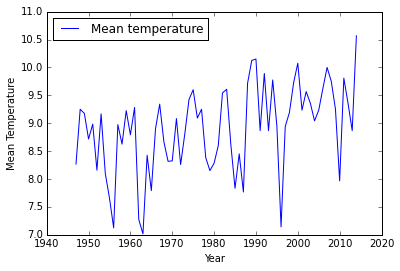

In [120]:
x = np.linspace(0, 20, 301)
years = np.arange(1947, 2015, 1)
plt.plot(years, temp.mean(-1), label='Mean temperature')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Mean Temperature')

## More Examples

* Many, many very good examples at the **Gallery**:

    http://matplotlib.org/gallery


* Examples for animations, Graphical User Interface:
    
    http://matplotlib.org/examples/index.html


## Conclusions

We have seen:
  1. How to do convenient, fast math in **NumPy**
  2. Where to find many useful tools with **SciPy and friends**
  3. Later more information on how to plot with **matplotlib**
 
Last point:
   1. Do *not* reinvent the wheel
   2. Algorithms matter
   3. "Premature optimization is the root of all evil" – Donald Knuth